## Configure osmnx and import things

In [6]:
import osmnx as ox
ox.config(log_console = True, data_folder = 'data')
graph = ox.load_graphml('nerails_with_pop.graphml')

In [2]:
import numpy as np
import networkx as nx
import scipy.sparse
import scipy.sparse.csgraph
import pandas as pd
import collections
import matplotlib.pyplot as plt

## Degree histogram

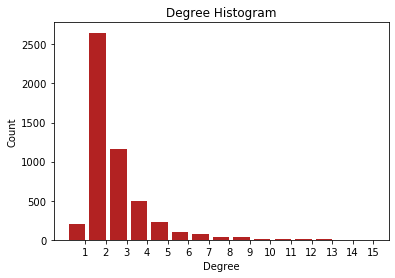

In [3]:
G = graph.to_undirected()

# https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='firebrick')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

## Weight histogram

          source      target     length id  oneway
0      306068527   306068577  19.604121  0   False
1      306068527   306068522   5.683369  0   False
2     3197892918  3391154047   3.561194  0   False
3     3197892918  4010276891  11.703475  0   False
4     3197892918  2518929502  10.428709  0   False
...          ...         ...        ... ..     ...
7157   209186424  4448459142  11.873378  0   False
7158   256675304  2211276932   6.872533  0   False
7159  1031873979    75362899   9.259882  0   False
7160  1327565008   354041965   6.698994  0   False
7161  2001306992  2001306989  14.739505  0   False

[7162 rows x 5 columns]


Text(0, 0.5, 'Count')

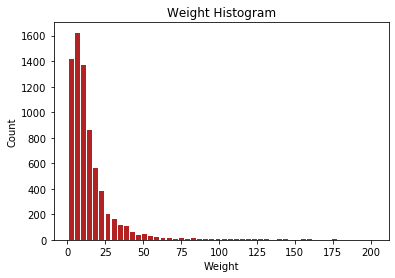

In [4]:
G = graph.to_undirected()
pandasel = nx.to_pandas_edgelist(G)

pandasel.length.plot.hist(bins=50, rwidth=0.8, color='firebrick')
plt.title('Weight Histogram')
plt.xlabel('Weight')
plt.ylabel('Count')

count     5014.000000
mean       935.448018
std       1397.976129
min          0.000000
25%        100.586681
50%        461.902878
75%       1151.558392
max      15387.807312
Name: population, dtype: float64


Text(0, 0.5, 'Count')

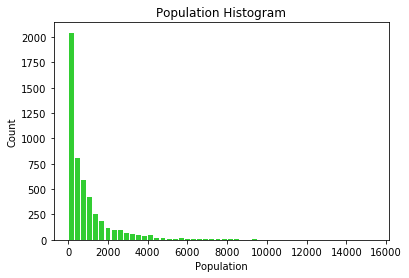

In [9]:
df = pd.DataFrame.from_dict(dict(graph.nodes), orient='index', columns=['population'])
df=df.astype(float)

print(df.population.describe())

df.population.plot.hist(bins=50, rwidth=0.8, color='limegreen')
plt.title('Population Histogram')
plt.xlabel('Population')
plt.ylabel('Count')